In [2]:
import pandas as pd
import geopandas as gpd
import folium
import folium.plugins
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [6]:
#Check the airbnb and city of chicago geojsons for overlap
community = gpd.read_file("chicagocomareas.geojson")
airbnb= gpd.read_file("chicagoairbnb.geojson")

In [8]:
#Check to make sure merge on names is 1 to 1
airbnb["neighbourhood"] = airbnb["neighbourhood"].str.upper()
community.merge(airbnb, left_on = "community", right_on = "neighbourhood").count()

community              77
area                   77
shape_area             77
perimeter              77
area_num_1             77
area_numbe             77
comarea_id             77
comarea                77
shape_len              77
geometry_x             77
neighbourhood          77
neighbourhood_group     0
geometry_y             77
dtype: int64

In [26]:
#Clean Demographics Data
demo = pd.read_csv("chicagodemographics.csv")
demo["GEOG"] = demo["GEOG"].str.upper()
demo = community.merge(demo, left_on = "community", right_on = "GEOG")
pop25 = ['LT_HS','HS','SOME_COLL','ASSOC','BACH','GRAD_PROF','INC_LT_25K','INC_25_50K','INC_50_75K','INC_75_100K','INC_100_150K','INC_GT_150']
for col in pop25:
    demo[col] = demo[col]/demo["POP_25OV"]*100
pop16 = ['IN_LBFRC','EMP','UNEMP','NOT_IN_LBFRC','WORK_AT_HOME','TOT_COMM']
for col in pop16:
    demo[col] = demo[col]/demo['POP_16OV']*100
totalpop = ["UND19", 'A20_34', 'A35_49', 'A50_64', 'A65_74', 'A75_84', 'OV85', 'WHITE', 'HISP', 'BLACK', 'ASIAN', 'OTHER', 'ONLY_ENGLISH','NOT_ENGLISH','LING_ISO','ENGLISH','SPANISH','SLAVIC','CHINESE','TAGALOG','ARABIC','KOREAN','OTHER_ASIAN','OTHER_EURO','OTHER_UNSPEC','NATIVE','FOR_BORN']
for col in totalpop:
    demo[col] = demo[col]/demo['TOT_POP']*100
demo["shape_area"] =demo["shape_area"].apply(float)
demo["PopDens"] = demo["TOT_POP"]/demo["shape_area"]

In [27]:
health = pd.read_csv("chicagohealth.csv")
health["Community Area Name"] = health["Community Area Name"].str.upper()
per100000=["Assault (homicide)", "Cancer (all sites)","Colorectal cancer", "Diabetes-related", "Firearm-related", "Lung cancer", "Stroke (cerebrovascular disease)"]
per1000=["Birth rate"]
demo =demo.merge(health, left_on = "GEOG", right_on = "Community Area Name")

In [28]:
demo["shape_area"] =demo["shape_area"].apply(float)

In [103]:
# Checking that all the community area names are the same, had to change OHARE AND LOOP AND MONTCLARE in a few of the files
# names = pd.DataFrame(demo["GEOG"].sort_values().reset_index())
# names2 = pd.DataFrame(health["Community Area Name"].sort_values()).reset_index()
# names4 =pd.concat([pd.DataFrame(community["community"].sort_values().reset_index()), names], ignore_index= True, axis =1)
# names5 = pd.concat([names2, names4], axis=1)
# names5[names5['Community Area Name'] != names5[3]]

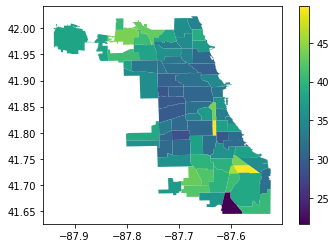

In [14]:
demo.plot("MED_AGE", legend =True)

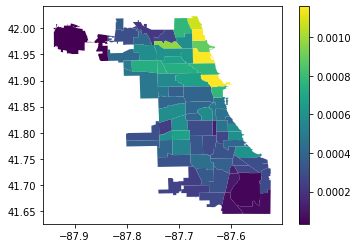

In [13]:
demo.plot("PopDens", legend =True)

In [29]:
notchange= ['community','shape_area','area_num_1','shape_len','geometry','2000_POP','2010_POP','TOT_POP','POP_16OV', 'POP_25OV', 'TOT_HH','OWN_OCC_HU','RENT_OCC_HU','VAC_HU','HU_TOT','HV_LT_150K','HV_150_300K','HV_300_500K','HV_GT_500K','MED_HV','AVG_VMT', 'OPEN_SPACE_PER_1000','Sfperc','Mfperc','MIXperc','COMMperc','INSTperc','INDperc','TRANSperc','Agperc','OPENperc','VACperc', 'POP_OV5', 'highly_walkable_pop_pct','highly_walkable_emp_pct','assoc_plus_pct','in_lbr_frc_pct','PopDens', 'Per Capita Income', 'A65_74','A75_84','OV85', 'Birth Rate','General Fertility Rate']
demo = demo.drop(["area", "perimeter", "area_numbe", "comarea_id", "comarea", "GEOG"], axis = 1)
demo = demo.drop(["Community Area", "Community Area Name"], axis = 1)
demo = demo.drop(["Gonorrhea in Males"], axis = 1)
demo["OV65"] = demo['A65_74']+demo['A75_84']+ demo["OV85"]
#change to 0-1 percents
for col in demo.columns:
    if col not in notchange:
        demo[col] = demo[col]/100

In [31]:
csv = pd.DataFrame(demo)
csv  =csv.drop("geometry",axis = 1)
csv.to_csv("chicagoquantitative.csv")
demo.to_file("chicago.geojson", driver='GeoJSON')